In [1]:
import os
import cv2
import yaml
import numpy as np
import random
import matplotlib.pyplot as plt

In [41]:
# go up one folder from /scripts
ROOT = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
# OR: ROOT = ".."  # works inside a notebook too

# Load config
with open(os.path.join(ROOT, "config/data_config.yml"), "r") as f:
    config = yaml.safe_load(f)

img_path = config["test"]

print("Notebook root:", ROOT)
print("Image folder:", img_path)

# pick a random image from train/images
images = [f for f in os.listdir(img_path)
          if f.lower().endswith((".jpg", ".jpeg", ".png"))]

assert images, "No images found in: " + img_path

# pick a random image filename
fname = random.choice(images)

# build full path to the image
full_img_path = os.path.join(img_path, fname)

print("Selected image:", full_img_path)

Notebook root: c:\Users\Equipo\Desktop\Main\Files\Projects\Avocado_Classifier
Image folder: ../data/test/images
Selected image: ../data/test/images\aug_56_9738422_jpg.rf.a1ee98c855964aa95c19c6b56cadcb86.jpg


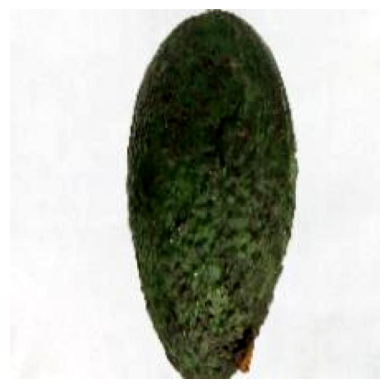

In [42]:
# load the image
img = cv2.imread(full_img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show it
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

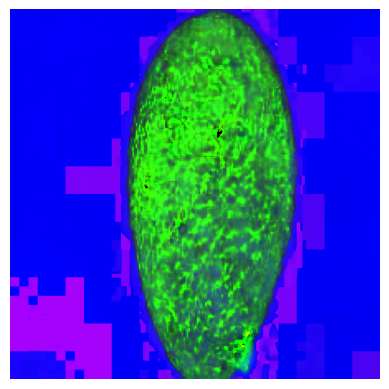

In [43]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.imshow(hsv)
plt.axis("off")
plt.show()

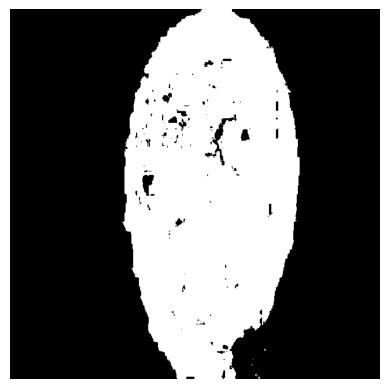

In [44]:
lower = np.array([25, 10, 10])
upper = np.array([95, 255, 255])

mask_raw = cv2.inRange(hsv, lower, upper)

plt.imshow(mask_raw, cmap="gray")
plt.axis("off")
plt.show()

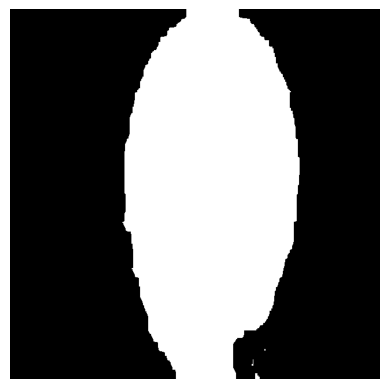

In [45]:
kernel = np.ones((25, 25), np.uint8)

mask_clean = cv2.morphologyEx(mask_raw, cv2.MORPH_CLOSE, kernel)
plt.imshow(mask_clean, cmap="gray")
plt.axis("off")
plt.show()

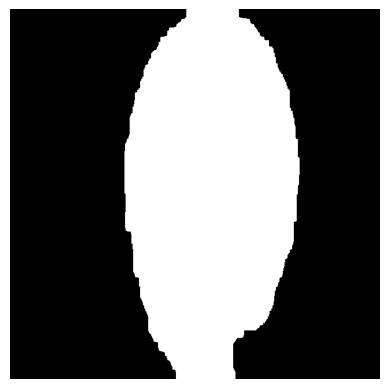

In [46]:
mask_clean2 = cv2.morphologyEx(mask_clean, cv2.MORPH_OPEN, kernel)

plt.imshow(mask_clean2, cmap="gray")
plt.axis("off")
plt.show()

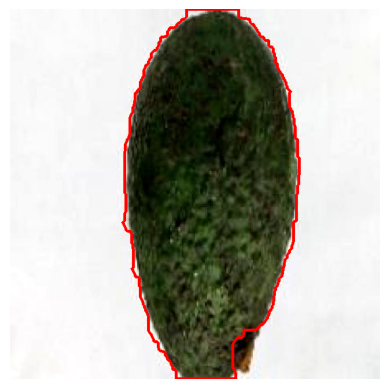

In [47]:
contours, _ = cv2.findContours(mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    raise ValueError("No contours found in the cleaned mask!")

cnt = max(contours, key=cv2.contourArea)

contour_vis = img.copy()
cv2.drawContours(contour_vis, [cnt], -1, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(contour_vis, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

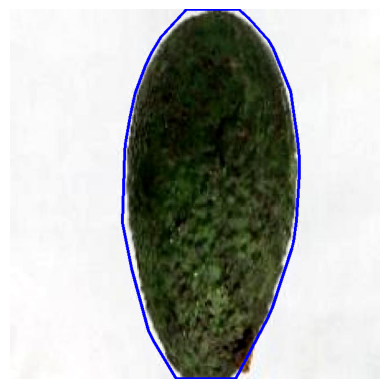

In [48]:
hull = cv2.convexHull(cnt)

hull_vis = img.copy()
cv2.drawContours(hull_vis, [hull], -1, (255, 0, 0), 4)

plt.imshow(cv2.cvtColor(hull_vis, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

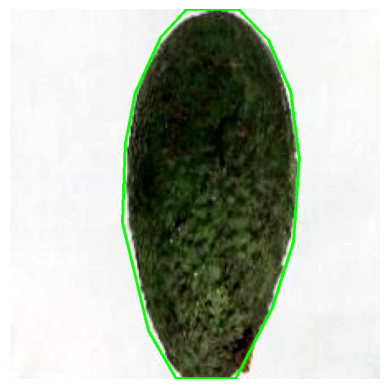

In [ ]:
epsilon = 0.003 * cv2.arcLength(hull, True)
approx = cv2.approxPolyDP(hull, epsilon, True)

poly_vis = img.copy()
cv2.polylines(poly_vis, [approx], True, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(poly_vis, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [35]:
h, w = img.shape[:2]
points = [(p[0][0] / w, p[0][1] / h) for p in approx]

print("YOLO Segmentation Points:")
for x, y in points:
    print(f"{x:.6f} {y:.6f}")

YOLO Segmentation Points:
0.571875 0.031250
0.635938 0.087500
0.690625 0.190625
0.732812 0.375000
0.737500 0.553125
0.706250 0.721875
0.659375 0.821875
0.604688 0.896875
0.498437 0.998437
0.487500 0.998437
0.340625 0.821875
0.276562 0.618750
0.290625 0.460938
0.343750 0.240625
0.415625 0.096875
0.489063 0.000000


In [50]:
# Extract pixel coordinates of polygon vertices
poly_x = [p[0][0] for p in approx]
poly_y = [p[0][1] for p in approx]

# Close the polygon by appending the starting point
poly_x.append(poly_x[0])
poly_y.append(poly_y[0])

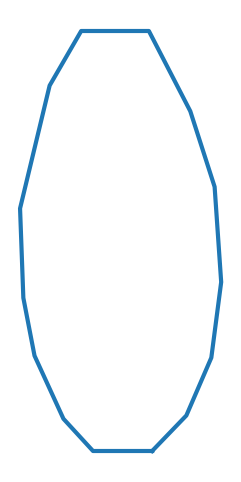

In [54]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(poly_x, poly_y, linewidth=3)
ax.set_aspect('equal')

# Flip Y-axis to match image coordinate system
plt.axis("off")
plt.show()